In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2014-01-01'
end = '2024-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\ayush\AppData\Local\Temp\ipykernel_27408\731553473.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.560261,27.674898,27.439930,27.618199,73129082
2014-01-03,27.359213,27.654593,27.357480,27.606808,66917888
2014-01-06,27.664251,27.702380,27.394868,27.557538,71037271
2014-01-07,28.197571,28.218122,27.759330,27.854405,102486711
2014-01-08,28.256250,28.407036,28.059659,28.374353,90036218
...,...,...,...,...,...
2024-12-23,195.531937,196.030768,191.182126,193.576511,15235900
2024-12-24,197.108261,197.208018,194.741796,195.711524,6809800


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.560259,27.674896,27.439928,27.618197,73129082
1,2014-01-03,27.359215,27.654595,27.357482,27.606810,66917888
2,2014-01-06,27.664249,27.702378,27.394866,27.557536,71037271
3,2014-01-07,28.197567,28.218119,27.759326,27.854402,102486711
4,2014-01-08,28.256250,28.407036,28.059659,28.374353,90036218
...,...,...,...,...,...,...
2762,2024-12-23,195.531952,196.030783,191.182141,193.576526,15235900
2763,2024-12-24,197.108246,197.208003,194.741780,195.711509,6809800
2764,2024-12-26,196.639343,197.696863,195.412207,196.280184,7907900


In [5]:
ma_100_days = data.Close.rolling(100).mean()

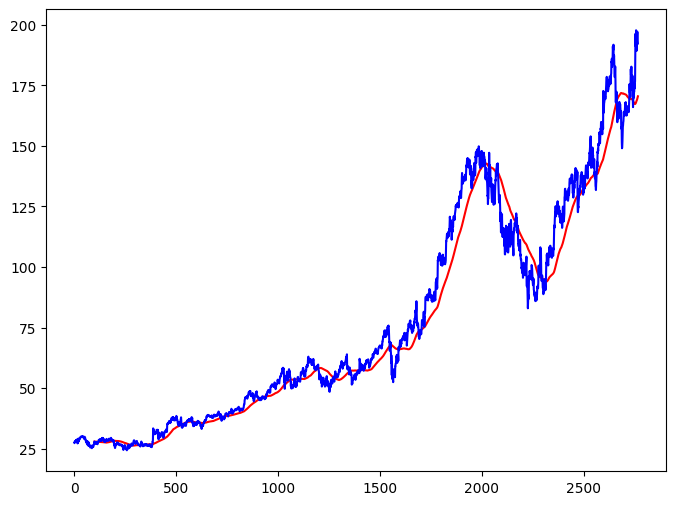

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'b')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

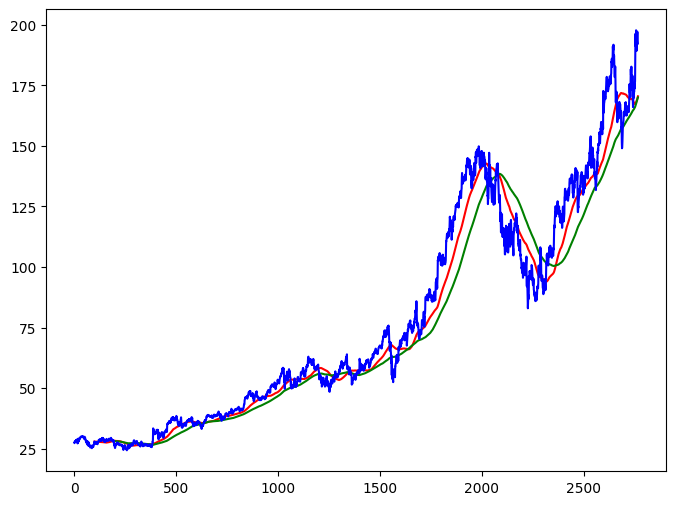

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'g')
plt.plot(data.Close, 'b')
plt.show()

In [9]:
data.dropna(inplace=True)

In [24]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):int(len(data))])

In [25]:
data_train.shape[0], data_test.shape[0]

(2213, 554)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_train_scale = scaler.fit_transform(data_train)

In [29]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)

In [30]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0585
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0060
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0059
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0061
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0084
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0056
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0044
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0050
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0040
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0039
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0039
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0039
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0038
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0044
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.00

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [20]:
pas_100_days = data_train.tail(100)

In [21]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [22]:
data_test

Ticker,GOOG
0,105.300087
1,105.214088
2,107.656075
3,112.132477
4,113.365143
...,...
649,195.531952
650,197.108246
651,196.639343
652,193.586487


In [31]:
data_test_scale = scaler.fit_transform(data_test)

In [32]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [33]:
y_predict = model.predict(x)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [34]:
y_predict

array([[0.15137824],
       [0.14931872],
       [0.1475693 ],
       [0.14617488],
       [0.14527334],
       [0.14501214],
       [0.14547482],
       [0.14675838],
       [0.14887053],
       [0.15177637],
       [0.15535423],
       [0.15937561],
       [0.16370794],
       [0.16821525],
       [0.17276293],
       [0.17725617],
       [0.18164837],
       [0.18590638],
       [0.19001895],
       [0.19403167],
       [0.19796927],
       [0.20183074],
       [0.20558822],
       [0.20924962],
       [0.21283445],
       [0.21631011],
       [0.2196274 ],
       [0.22271392],
       [0.22552276],
       [0.22802465],
       [0.23022412],
       [0.23208605],
       [0.23357959],
       [0.2347858 ],
       [0.2358043 ],
       [0.23671721],
       [0.2375494 ],
       [0.23830405],
       [0.23895893],
       [0.23950699],
       [0.23999007],
       [0.24045369],
       [0.24101226],
       [0.2418569 ],
       [0.24314696],
       [0.24496233],
       [0.24734633],
       [0.250

In [35]:
scaler.scale_

array([0.00871838])

In [36]:
1/scaler.scale_

array([114.7002182])

In [37]:
scale = 1/scaler.scale_

In [38]:
y_predict = y_predict*scale

In [39]:
y = y*scale

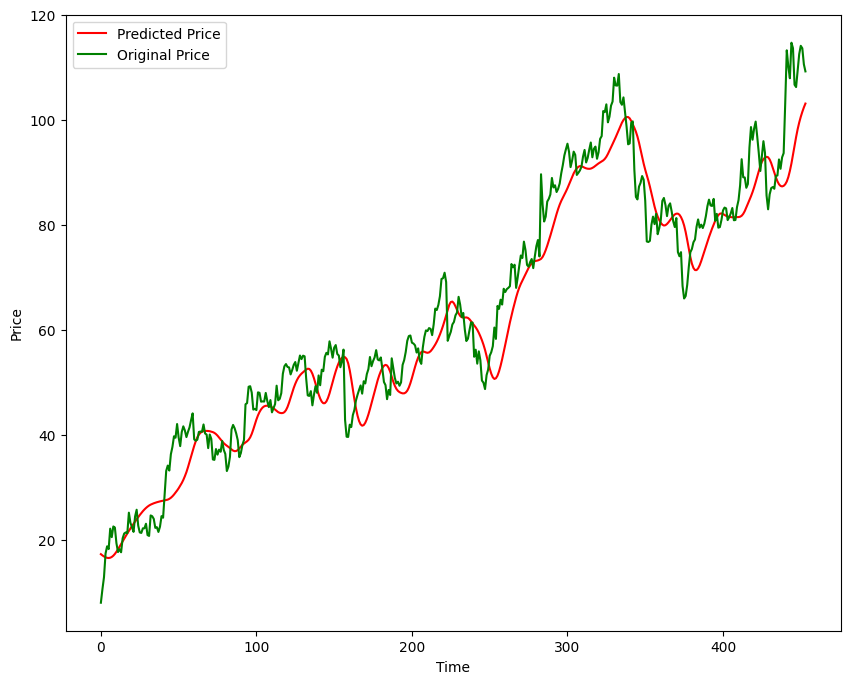

In [40]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
model.save('Stock Prediction Model.keras')